# Projeto Integrador I - EDA

A imobiliária Properati publica periodicamente informações sobre ofertas de imóveis para venda e aluguel. Deve aconselhar o agente imobiliário a desenvolver um modelo de regressão que permita prever o preço por metro quadrado de um imóvel. O objetivo final é que o modelo desenvolvido por eles seja utilizado como avaliador automático a ser aplicado nos próximos imóveis que forem comercializados pela empresa. Para isso, a empresa disponibiliza um conjunto de dados correspondente ao primeiro semestre de 2017.


**Objetivos:**


*   Executar uma limpeza do conjunto de dados fornecido. Em particular, você precisará elaborar estratégias para lidar com dados ausentes em determinadas variáveis.
*   Realizar uma análise descritiva das principais variáveis.
*   Criar novas colunas de determinados recursos que podem ter valor preditivo.


## Importando a Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prop = pd.read_csv(r"C:\Users\RedRagon\Documents\ProjetoIntegrador1\Data\Real_State_Properati.csv",sep='\t')

## Entendo as informações que possuímos na base



### Visualizando a base

In [5]:
prop.shape

(17223, 9)

In [6]:
prop.head(5)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


### Verificando se existem valores vazios ou nulos e os tipos das colunas

In [7]:
prop.isna().sum()

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64

In [8]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


### Verificando quantos itens distintos possuímos nas colunas

In [9]:
for col in prop.columns:
    print(col, "-", len(prop[col].unique()))

property_type - 4
place_name - 62
country_name - 1
state_name - 1
lat - 9714
lon - 9704
price - 2754
currency - 2
surface_total_in_m2 - 568


In [10]:
prop['property_type'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

### Verificando qual a quantidade e o peso de cada tipo de Propriedade

In [11]:
prop.groupby(by = 'property_type').count()['place_name'].sort_values(ascending = False)

property_type
apartment    14428
PH            1142
house          888
store          765
Name: place_name, dtype: int64

In [12]:
prop['property_type'].value_counts()/len(prop['property_type'])*100

apartment    83.771701
PH            6.630668
house         5.155896
store         4.441735
Name: property_type, dtype: float64

### Verificando qual a quantidade e o peso de cada tipo de Moeda


In [13]:
prop.groupby(by = 'currency').count()['place_name'].sort_values(ascending = False)

currency
USD    16700
ARS      523
Name: place_name, dtype: int64

In [14]:
prop['currency'].value_counts()/len(prop['currency'])*100

USD    96.963363
ARS     3.036637
Name: currency, dtype: float64

## Limpando os Dados

### Removendo colunas desnecessárias

Como o país e o estados são os mesmos pra todo o dataset, então podemos retirá-los pois não irá inteferir em nosso estudo.

In [15]:
prop.drop(columns=['country_name','state_name'], inplace= True)

In [16]:
prop.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price', 'currency',
       'surface_total_in_m2'],
      dtype='object')

### Normalizando o preço com base em dólares e removendo colunas desnecessárias

In [17]:
prop["price_usd"] = prop.apply(lambda x: x["price"] if x["currency"] == "USD" else x["price"]/117.41,axis=1)

Como deixamos tudo em dólar e ainda criamos outra coluna para esse preço em dólar, podemos então tirar as colunas "price" e "currency" pois não fará diferença em nossos estudos também.

In [18]:
prop.drop(columns=['price','currency'], inplace= True)

In [19]:
prop.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'surface_total_in_m2',
       'price_usd'],
      dtype='object')

### Criando uma coluna com o preço por metro quadrado

In [20]:
prop["preco_metro2"] = prop.price_usd / prop.surface_total_in_m2

In [21]:
prop.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'surface_total_in_m2',
       'price_usd', 'preco_metro2'],
      dtype='object')

### Verificando a distribuição dos dados para as colunas de tamanho e preço de propriedade

In [22]:
for i in prop.property_type.unique():
    print(i)
    print(prop.loc[prop.property_type == i,['preco_metro2']].describe())
    print('--------------------')

PH
       preco_metro2
count   1142.000000
mean    1695.710382
std      913.749082
min       18.370350
25%     1222.549020
50%     1625.000000
75%     2053.632764
max    25000.000000
--------------------
apartment
       preco_metro2
count  1.442800e+04
mean            inf
std             NaN
min    1.051501e+01
25%    2.018824e+03
50%    2.459016e+03
75%    3.018878e+03
max             inf
--------------------
house
       preco_metro2
count    888.000000
mean    1716.153891
std     1699.025955
min      214.592275
25%     1057.179184
50%     1451.163795
75%     1946.810507
max    23064.516129
--------------------
store
       preco_metro2
count    765.000000
mean    2794.266120
std     2139.406072
min        6.067020
25%     1454.545455
50%     2258.064516
75%     3538.461538
max    22000.000000
--------------------


#### Identificado que existe problema com a coluna preço por metro quadrado para o apartamentos

In [23]:
for i in prop.property_type.unique():
    print(i)
    print(prop.loc[prop.property_type == i, 'preco_metro2'].std())
    print('--------------------')

PH
913.7490817204806
--------------------
apartment
nan
--------------------
house
1699.0259549644643
--------------------
store
2139.406071876024
--------------------


Olhando o notebook, verificamos que contém alguns imóveis com a surface igual a 0.

In [24]:
prop[(prop.property_type == 'apartment') & (prop.surface_total_in_m2 == 0)]

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2
2486,apartment,Palermo Soho,-34.589974,-58.425614,0.0,780000.0,inf
4872,apartment,Recoleta,-34.588818,-58.390648,0.0,320000.0,inf
5454,apartment,Caballito,-34.617348,-58.449404,0.0,68500.0,inf
6318,apartment,Palermo Hollywood,-34.582558,-58.432585,0.0,175000.0,inf
7170,apartment,Barracas,-34.641131,-58.369122,0.0,135000.0,inf
15888,apartment,Barrio Norte,-34.598727,-58.395851,0.0,112000.0,inf


#### Removendo essas linhas e verificando os novos valores de desvio padrão

In [25]:
prop.drop(index = list(prop[(prop.property_type == 'apartment') & (prop.surface_total_in_m2 == 0)].index),inplace = True)

In [26]:
for i in prop.property_type.unique():
    print(prop.loc[prop.property_type == i, 'preco_metro2'].std())

913.7490817204806
2750.929484751443
1699.0259549644643
2139.406071876024


### Limpando os dados conforme a distribuição - Via Desvio Padrão

In [27]:
for i in prop.property_type.unique():
    print(i)
    print("Temos", prop.loc[(prop.property_type == i) & (prop.preco_metro2 > 3*prop.preco_metro2.std()),'preco_metro2'].shape[0], "linha(s) onde o valor supera 3 vezes o desvio padrão")
    print('-------------------------------------------------------------')

PH
Temos 1 linha(s) onde o valor supera 3 vezes o desvio padrão
-------------------------------------------------------------
apartment
Temos 211 linha(s) onde o valor supera 3 vezes o desvio padrão
-------------------------------------------------------------
house
Temos 7 linha(s) onde o valor supera 3 vezes o desvio padrão
-------------------------------------------------------------
store
Temos 20 linha(s) onde o valor supera 3 vezes o desvio padrão
-------------------------------------------------------------


In [28]:
for i in prop.property_type.unique():
    prop.drop(index = list(prop.loc[(prop.property_type == i) & (prop.preco_metro2 > 3*prop.preco_metro2.std())].index), inplace = True)

In [29]:
for i in prop.property_type.unique():
    print(i)
    print(prop.loc[prop.property_type == i,['preco_metro2']].describe())
    print('--------------------')

PH
       preco_metro2
count   1141.000000
mean    1675.285939
std      599.047243
min       18.370350
25%     1222.222222
50%     1625.000000
75%     2050.147493
max     4768.115942
--------------------
apartment
       preco_metro2
count  14211.000000
mean    2590.575386
std     1060.344945
min       10.515015
25%     2009.259259
50%     2444.549020
75%     2998.478175
max     7837.837838
--------------------
house
       preco_metro2
count    857.000000
mean    1492.571201
std      628.866979
min      214.592275
25%     1041.666667
50%     1423.357664
75%     1857.142857
max     3400.000000
--------------------
store
       preco_metro2
count    561.000000
mean    1846.779912
std      790.390203
min        6.067020
25%     1238.095238
50%     1785.714286
75%     2500.000000
max     3409.090909
--------------------


In [30]:
prop.shape

(16770, 7)

## Plotandos os dados

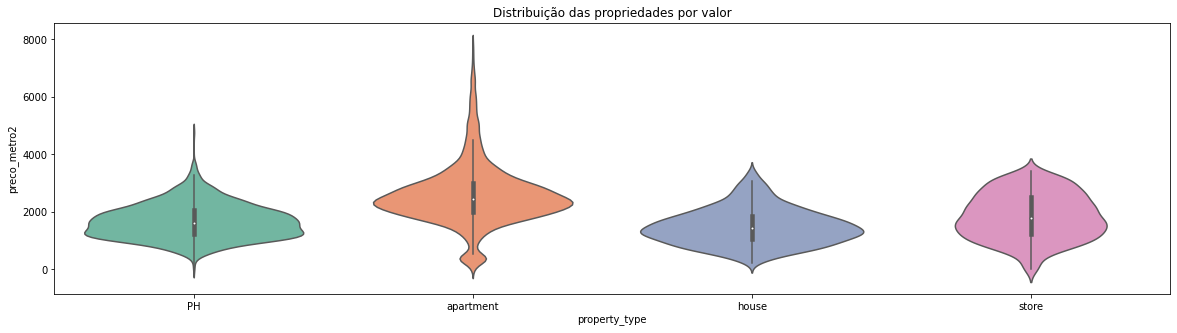

In [31]:
ax = sns.violinplot(data = prop, x = "property_type" , y = "preco_metro2", palette='Set2')
plt.title("Distribuição das propriedades por valor")
ax.figure.set_size_inches(20, 5)

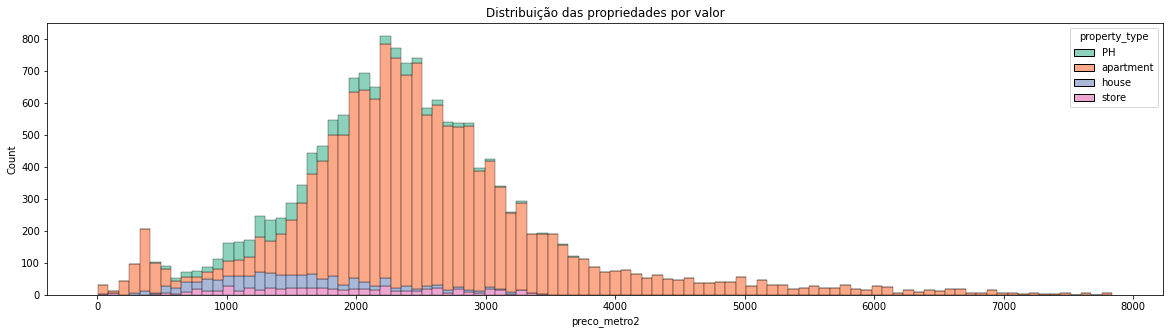

In [32]:
ay = sns.histplot(data=prop, x="preco_metro2", hue="property_type", multiple='stack', palette='Set2')
plt.title("Distribuição das propriedades por valor")
ay.figure.set_size_inches(20, 5)

## Criando variáveis

### Faixas de Preco

In [33]:
prop['Faixas_de_preco_m2'] = pd.qcut(x = prop.preco_metro2, q = 10, labels = [1,2,3,4,5,6,7,8,9,10])

In [34]:
prop.head()

,property_type,place_name,lat,lon,surface_total_in_m2,price_usd,preco_metro2,Faixas_de_preco_m2
0,PH,Mataderos,-34.661824,-58.508839,55.0,62000.0,1127.272727,1
1,apartment,Mataderos,-34.652262,-58.522982,55.0,72000.0,1309.090909,2
2,apartment,Belgrano,-34.559873,-58.443362,45.0,138000.0,3066.666667,9
3,apartment,Belgrano,-34.559873,-58.443362,65.0,195000.0,3000.000000,8
4,PH,Mataderos,-34.652356,-58.501624,140.0,239000.0,1707.142857,2


In [35]:
tb = prop.loc[prop.property_type == 'apartment', ['place_name','Faixas_de_preco_m2', 'preco_metro2']].\
pivot_table(values = 'place_name', index = 'place_name', columns = 'Faixas_de_preco_m2', aggfunc = 'count')
tb.round()

Faixas_de_preco_m2,1,2,3,4,5,6,7,8,9,10
place_name,,,,,,,,,,
Abasto,2,6,6,5,8,8,3,3,0,0
Agronomía,0,0,3,4,4,7,2,0,0,0
Almagro,45,47,111,144,110,67,43,46,24,11
Balvanera,30,95,94,53,33,34,15,12,4,1
Barracas,7,54,63,27,22,27,18,11,7,5
...,...,...,...,...,...,...,...,...,...,...
Villa Real,1,0,2,1,0,0,0,0,0,0
Villa Santa Rita,0,2,1,4,4,2,0,0,0,0
Villa Soldati,2,0,1,0,0,0,0,0,0,0


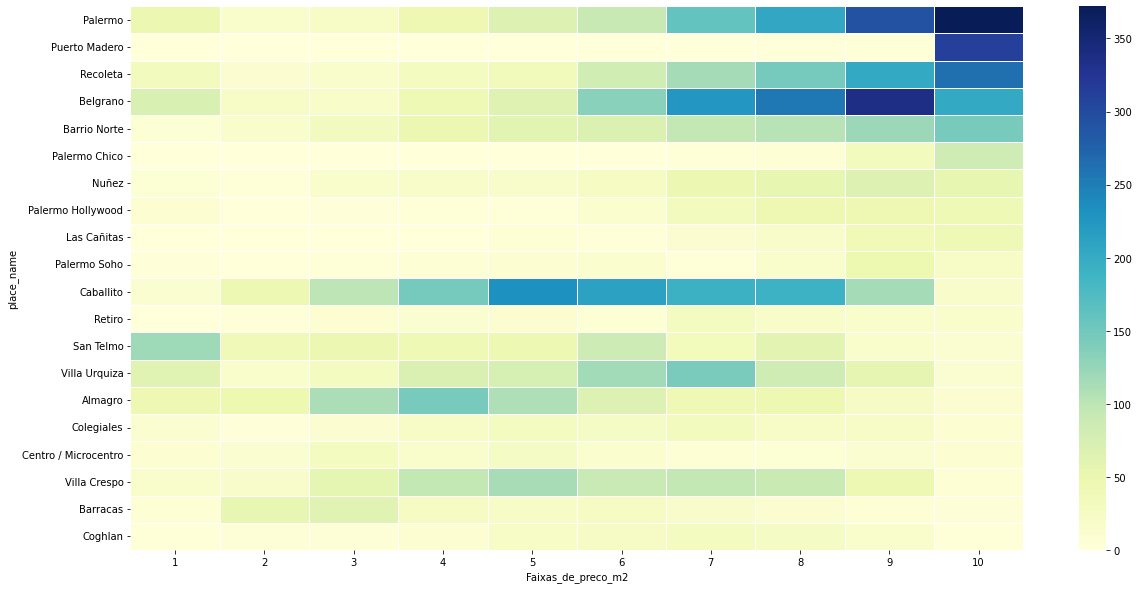

In [36]:
az = sns.heatmap( data = tb.sort_values(by = 10, ascending = False).head(20) , linewidths=1, cmap="YlGnBu")
az.figure.set_size_inches(20, 10)